RAW COSINE SIMILARITIES (no centering)
  cos(X, Y)         = 0.9984038297885897
  cos(X, Y_shifted) = 0.9622504486493763 (notice it changes if we shift Y)

PEARSON CORRELATION
  corr(X, Y)         = 0.9999999999999999
  corr(X, Y_shifted) = 0.9999999999999999 (same correlation despite shifting Y)

COSINE SIMILARITIES AFTER MEAN-CENTERING
  cos(X_centered, Y_centered)         = 0.9999999999999998
  cos(X_centered, Y_shifted_centered) = 0.9999999999999998


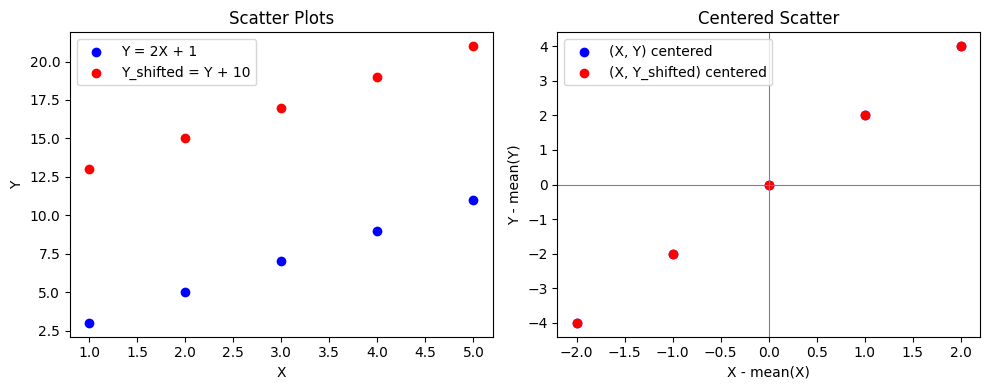

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1) CREATE EXAMPLE DATA
# -------------------------------------------------------------
# We'll create two simple 1D datasets:
#    X: a linearly increasing series
#    Y: strongly related to X (Y = 2*X + 1)
# Then we'll create Y_shifted, which is the same as Y but shifted by +10.
# This shift will NOT change correlation but WILL change raw cosine similarity.

X = np.array([1, 2, 3, 4, 5], dtype=float)
Y = 2*X + 1               # e.g., [3, 5, 7, 9, 11]
Y_shifted = Y + 10        # e.g., [13, 15, 17, 19, 21]

# -------------------------------------------------------------
# 2) COMPUTE STATISTICS
# -------------------------------------------------------------
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# (a) Raw cosine similarities (without centering)
cos_raw = cosine_similarity(X, Y)
cos_raw_shifted = cosine_similarity(X, Y_shifted)

# (b) Pearson correlations
corr_XY = np.corrcoef(X, Y)[0, 1]
corr_XY_shifted = np.corrcoef(X, Y_shifted)[0, 1]

# (c) Cosine similarities AFTER mean-centering
X_centered = X - np.mean(X)
Y_centered = Y - np.mean(Y)
Y_shifted_centered = Y_shifted - np.mean(Y_shifted)

cos_centered = cosine_similarity(X_centered, Y_centered)
cos_shifted_centered = cosine_similarity(X_centered, Y_shifted_centered)

# -------------------------------------------------------------
# 3) DISPLAY RESULTS
# -------------------------------------------------------------
print("RAW COSINE SIMILARITIES (no centering)")
print("  cos(X, Y)         =", cos_raw)
print("  cos(X, Y_shifted) =", cos_raw_shifted, "(notice it changes if we shift Y)")

print("\nPEARSON CORRELATION")
print("  corr(X, Y)         =", corr_XY)
print("  corr(X, Y_shifted) =", corr_XY_shifted, "(same correlation despite shifting Y)")

print("\nCOSINE SIMILARITIES AFTER MEAN-CENTERING")
print("  cos(X_centered, Y_centered)         =", cos_centered)
print("  cos(X_centered, Y_shifted_centered) =", cos_shifted_centered)

# -------------------------------------------------------------
# 4) MAKE A QUICK PLOT
# -------------------------------------------------------------
plt.figure(figsize=(10,4))

# Left subplot: X vs. Y
plt.subplot(1,2,1)
plt.scatter(X, Y, c='blue', label='Y = 2X + 1')
plt.scatter(X, Y_shifted, c='red', label='Y_shifted = Y + 10')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plots")
plt.legend()

# Right subplot: Centered data
plt.subplot(1,2,2)
plt.scatter(X_centered, Y_centered, c='blue', label='(X, Y) centered')
plt.scatter(X_centered, Y_shifted_centered, c='red', label='(X, Y_shifted) centered')
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlabel("X - mean(X)")
plt.ylabel("Y - mean(Y)")
plt.title("Centered Scatter")
plt.legend()

plt.tight_layout()
plt.show()
